# Matplotlib基础介绍

在我们深入讨论与Matplotlib创建可视化的细节之前，您应该了解关于使用包的一些有用的东西。

## 导入 Matplotlib

就像我们用``np`` 来表示“NumPy”和 ``pd``来表示“Pandas”的缩写一样，我们将用一些标准的缩写来作为Matplotlib的导入:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### 设置样式

我们将使用``plt.style``指令为我们的图形选择合适的美学风格。

在这里，我们将设置 ``classic``的风格，它确保我们创建的图使用经典的Matplotlib风格:

In [2]:
plt.style.use('classic')

在本次实验中，我们将根据需要调整此样式。

注意，这里使用的样式表是作为Matplotlib版本1.5支持的;如果您使用的是早期版本的Matplotlib，那么只能使用默认样式。

### ``show()`` 或不``show()``? 如何展示你的图像？

您无法看到的可视化将不会有多大用处，但是您如何看待Matplotlib情节取决于上下文。

Matplotlib的最佳使用取决于您如何使用它;大致上，这三个适用的上下文是在脚本中使用Matplotlib，在IPython终端中，或者在IPython notebook中。

#### 从一个脚本绘制出图

如果您使用的是脚本中的Matplotlib，函数 ``plt.show()`` 是您的朋友。

``plt.show()``启动一个事件循环，查找所有当前活动的图形对象，并打开一个或多个显示您的图形或图形的交互式窗口。

例如，您可能有一个名为*myplot.py*的文件包含以下内容:
```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```
然后，您可以从命令行提示符运行这个脚本，这将导致打开一个窗口，显示您的图形:

```
$ python myplot.py
```

 ``plt.show()``命令在后台执行很多操作，因为它必须与系统的交互图形后端交互。

这个操作的细节可以从系统到系统，甚至安装到安装都有很大的差别，但是matplotlib会尽力隐藏所有这些细节。

需要注意的一件事是: ``plt.show()`命令在每个Python会话应该*只使用一次*，最常见的是在脚本的结尾。

多个``show()``命令可能导致不可预知的后端依赖行为，并且应该尽量避免。

#### 在IPython shell中绘图

在IPython shell中交互式地使用Matplotlib是非常方便的。

如果您指定Matplotlib模式，则构建IPython与Matplotlib一起工作。

要启用此模式，您可以在启动``ipython``之后使用``%matplotlib`` 的魔法命令:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

在这一点上，任何``plt``的plot命令都会导致一个图形窗口打开，并且可以运行更多的命令来更新这个图。

一些更改(例如修改已经绘制的行的属性)不会自动绘制:强制更新，使用``plt.draw()``。

使用 ``plt.show()``在Matplotlib模式下是不需要的。

#### 在IPython notebook中绘图

IPython notebook是一种基于浏览器的交互式数据分析工具，可以将叙事、代码、图形、HTML元素和更多的内容结合到一个可执行文档中。

可以使用 ``%matplotlib``命令在IPython笔记本中交互绘图，并以类似于IPython shell的方式工作。

在IPython笔记本中，您还可以选择直接在笔记本中嵌入图形，有两个可能的选项:

- ``%matplotlib notebook`` 将会导致在notebook中嵌入*互动的*图像。
- ``%matplotlib inline`` 将会导致在notebook中嵌入*静态的*图像。

对于课程，我们通常会选择``%matplotlib inline``:

In [4]:
%matplotlib inline

在运行此命令后(每个内核/会话只需要执行一次)，创建一个plot的notebook内的任何单元都将嵌入结果图形的PNG图像:

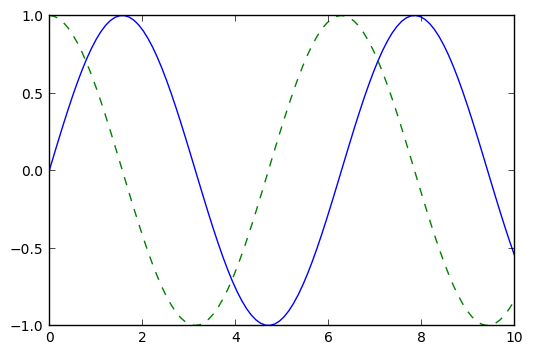

In [5]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### 保存图表到文件中

Matplotlib的一个很好的特性是能够以各种格式保存数据。

可以使用 ``savefig()`` 命令来保存一个图形。

例如，为了将前面的图形保存为PNG文件，可以运行以下操作:

In [4]:
fig.savefig('my_figure.png')

现在我们当前工作目录中有了一个名为“my_figure.png的文件:

In [5]:
!ls -lh my_figure.png

-rw-r--r--  1 chenhaopeng  staff    38K  3 21 12:55 my_figure.png


为了确认它包含了我们认为包含的内容，让我们使用IPython的Image对象来显示该文件的内容:

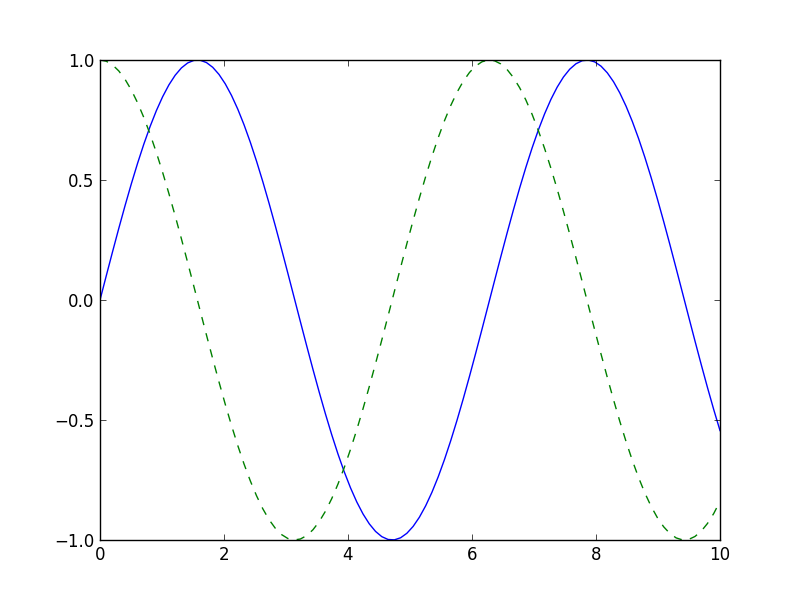

In [6]:
from IPython.display import Image
Image('my_figure.png')

在 ``savefig()``中，文件格式从给定文件名的扩展名推断出来。

根据您安装的后端，可以使用许多不同的文件格式。

通过使用图形画布对象的以下方法，可以为您的系统找到支持的文件类型列表:

In [7]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

注意，在保存您的图形时，不需要使用``plt.show()``或前面讨论的相关命令。

## 一单位代价下的两个接口

Matplotlib的一个潜在的令人困惑的特性是它的对偶接口:一个方便的matlab风格的基于状态的接口，以及一个更强大的面向对象的接口。我们将快速地强调这两者之间的区别。

#### MATLAB 风格的接口

Matplotlib最初是作为MATLAB用户的Python替代品编写的，它的许多语法反映了这一事实。

matlabstyle工具包含在pyplot  (``plt``) 接口中。

例如，下面的代码可能对于MATLAB用户看起来很熟悉:

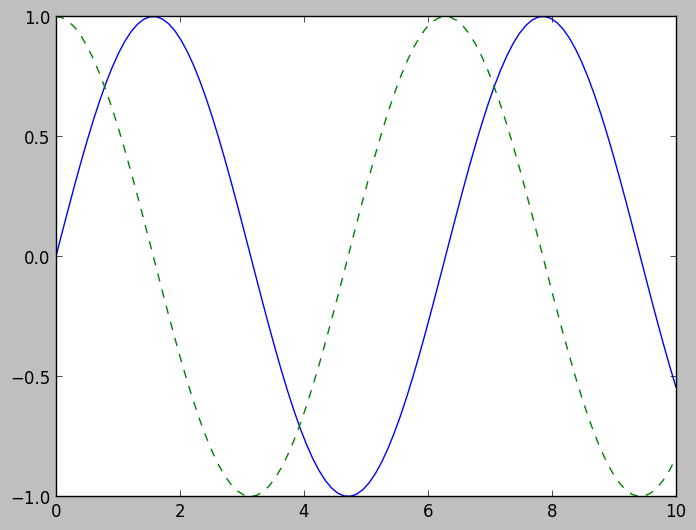

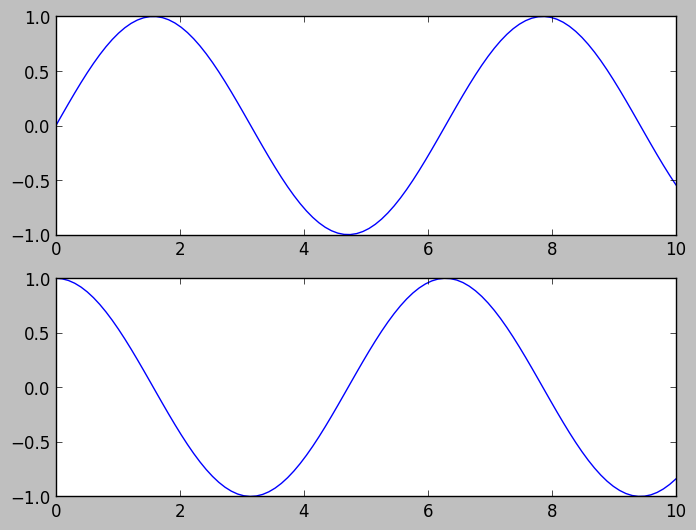

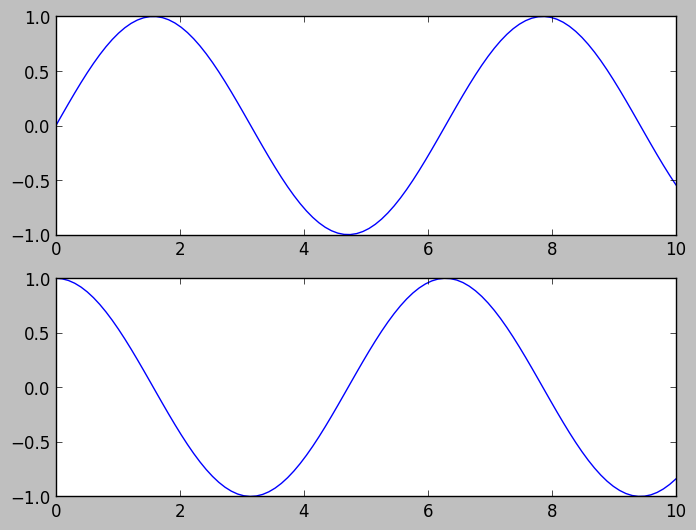

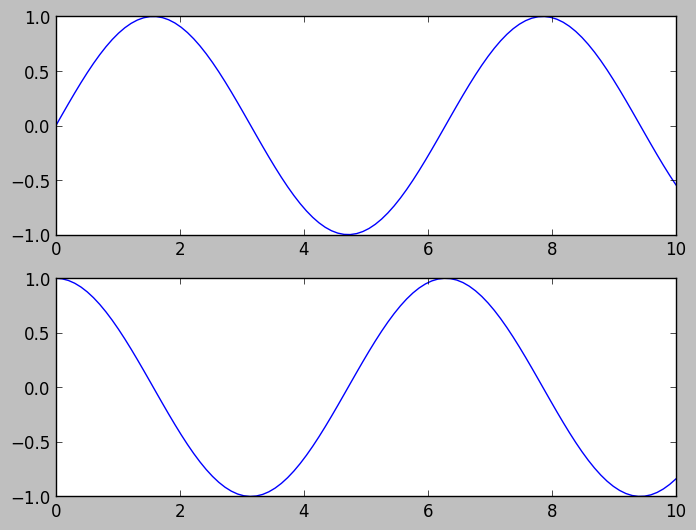

In [10]:
plt.figure()  # 创建一个图形

# 创建两个面板中的第一个，设置当前轴
plt.subplot(2, 1, 1) # (行，列，面板号)
plt.plot(x, np.sin(x))

# 创建两个面板中的第二个，设置当前轴
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

plt.show()

需要注意的是，这个接口是 *stateful*:它跟踪“当前的”图形和轴，这是所有``plt`` 命令应用的地方。

您可以使用``plt.gcf()``(获得当前图形)和 ``plt.gca()``(获取当前的轴)例程来获得这些参数。

虽然这个有状态接口对于简单的情节来说是快速和方便的，但是很容易遇到问题。

例如，一旦创建了第二个面板，我们如何返回并添加到第一个面板?

这在matlabstyle界面中是可能的，但是有点笨拙。

幸运的是，我们有更好的方法。

#### 面向对象的接口

面向对象的接口可用于这些更复杂的情况，以及当您希望对您的图形进行更多的控制时。

在面向对象的接口中，绘图函数是显式``图形``和``坐标轴``对象的*方法*，而不是依赖于某个"活动"图形或轴的某些概念。

要使用这种绘图方式重新创建之前的图，您可以执行以下操作:

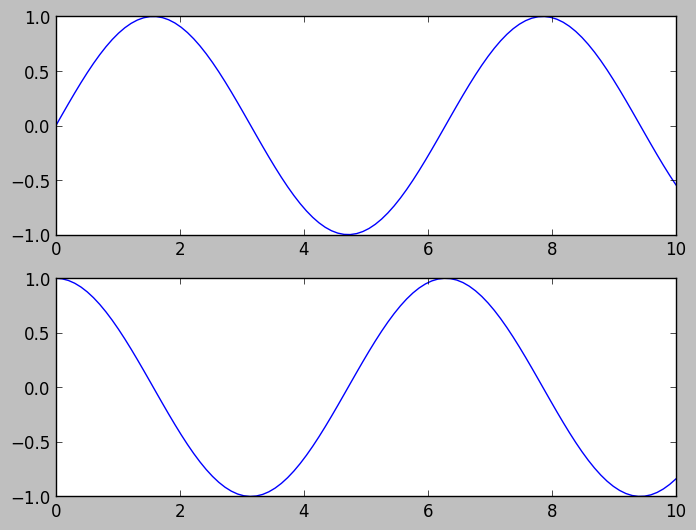

In [11]:
# 首先创建一个图表网格
# ax将是两个轴对象的数组
fig, ax = plt.subplots(2)

# 在合适的对象上调用plot()方法
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

plt.show()

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 1:</h1>

<b>创建y：1到10之间100个均匀间隔的数。</b>
</div>

 <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q1" class="collapse">
```
代码：
y = np.linspace(0, 10, 100)
print(y)
    
运行结果：
[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8.28282828  8.38383838
  8.48484848  8.58585859  8.68686869  8.78787879  8.88888889  8.98989899
  9.09090909  9.19191919  9.29292929  9.39393939  9.49494949  9.5959596
  9.6969697   9.7979798   9.8989899  10.        ]

```
</div>

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 2:</h1>

<b>绘制y的sin、cos、tan图形。</b>
</div>

 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q2" class="collapse">
```
代码：
fig, test1 = plt.subplots(3)
test1[0].plot(y, np.sin(y))
test1[1].plot(y, np.cos(y))
test1[2].plot(y, np.tan(y));
    
```
</div>

对于更简单的情节，选择哪种风格主要取决于偏好，但是随着情节变得更加复杂，面向对象的方法可能成为必要。

在本课程中，我们将在matlabstyle和面向对象的接口之间进行切换，这取决于最方便的是什么。

在大多数情况下，差别就像开关``plt.plot()``到``ax.plot()``一样小，但是有几个问题，我们将在后面的实验中突出显示。